In [1]:
from scipy import special
import numpy as np 


In [4]:

zeroes = special.jn_zeros(2,5)  #kth order (2nd) order bessel functions , first smallets five solutions where it will be 0.

print(zeroes)

[ 5.1356223   8.41724414 11.61984117 14.79595178 17.95981949]


In [5]:

zeroes = special.jn_zeros(3,5)  #kth order (3rd) order bessel functions , first smallets five solutions where it will be 0.

print(zeroes)

[ 6.3801619   9.76102313 13.01520072 16.22346616 19.40941523]


In [7]:
jn = special.jn(2,5)  #nth order (2nd) bessel equation values at x=5, X is fixed points like
print(jn)

0.04656511627775229


In [8]:
jn = special.jn(3,10)  #nth order (3rd) bessel equation values at x=10
print(jn)

0.05837937930518667


In [22]:
#gamma = 0 to infinity intgral of t^n-1.e^-t.dt
#gamma(5) = 0 to infinity integra of t^5-1.e^-t.dt

x =5
result = special.gamma(x)
print(result)

24.0


In [25]:
from scipy import integrate

def integrand(t,x):
    return t**(x-1) * np.exp(-t)

result, error = integrate.quad(integrand,0,np.inf,args=(5))
print(result)

24.0


In [27]:
from scipy.special import airy

#airy is 1/pi * cos(t^3/3+xt)dt (0 to inf)

x = 0.5
ai, aip, bi, bip = airy(x)

print("Ai(0.5):", ai)

Ai(0.5): -0.224910532664684


In [32]:
def integrand_airy(t,x):
    return np.cos((t**3)/3 + x*t)

airy,error = integrate.quad(integrand,0,np.inf,args=(0.5))
airy = airy/np.pi

print(airy)

-1307.247654357772


C:\Users\ACER\AppData\Local\Temp\ipykernel_24468\2058812382.py:4: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  airy,error = integrate.quad(integrand,0,np.inf,args=(0.5))


In [17]:
def drumhead_height(n,k,distance,angle,t):
    kth_zero = special.jn_zeros(n,k)[-1]
    return np.cos(t) * np.cos(n*angle) * special.jn(n, distance*kth_zero)

theta = np.r_[0:np.pi:50j] #0 to pi range, 50 value required
radius = np.r_[0:1:50j]


x = np.array([r*np.cos(theta) for r in radius])
y = np.array([r*np.sin(theta) for r in radius])
z = np.array([drumhead_height(1,1,r,theta,0.5) for r in radius])
#first order vibration of multihead , from documentation.

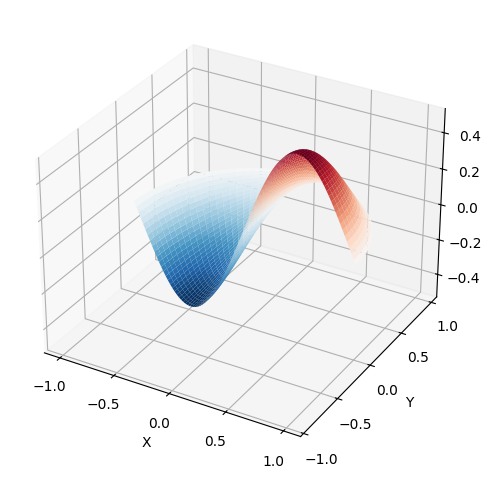

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes(rect=(0, 0.05, 0.95, 0.95), projection='3d')
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='RdBu_r', vmin=-0.5, vmax=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xticks(np.arange(-1, 1.1, 0.5))
ax.set_yticks(np.arange(-1, 1.1, 0.5))
ax.set_zlabel('Z')
plt.show()